# Scraper Berita Detik.com

## Gambaran Umum
Notebook ini mengimplementasikan web scraper untuk Detik.com, salah satu situs berita utama di Indonesia. Scraper ini mengumpulkan artikel berita dari berbagai kategori, dengan mengekstrak informasi berupa judul, tanggal, konten, dan kategori.

## Fitur
- Pengambilan berita dari berbagai kategori
- Penanganan paginasi secara otomatis
- Menyaring konten video dan infografik
- Ekspor data ke format CSV

## Dependensi
- BeautifulSoup4: Untuk parsing HTML
- requests: Untuk melakukan permintaan HTTP
- pandas: Untuk manipulasi dan ekspor data
- tqdm: Untuk pelacakan progres
- matplotlib: Untuk visualisasi data

In [12]:
# Import libraries
import os
from bs4 import BeautifulSoup as bs
from tqdm import tqdm 
import requests
import pandas as pd

## Kategori Berita yang Tersedia

Scraper ini mendukung kategori-kategori berikut dari Detik.com:

### Grup Kategori 1 (Format URL Standar)
- **finance**: Berita ekonomi, bisnis, dan investasi
- **inet**: Berita teknologi, informasi, dan gadget
- **sport**: Liputan olahraga
- **oto**: Berita otomotif (dalam dan luar negeri)
- **travel**: Inspirasi perjalanan dan destinasi wisata
- **food**: Berita kuliner, resep, dan rekomendasi restoran
- **health**: Artikel kesehatan, diet, dan konsultasi

### Grup Kategori 2 (Format URL Alternatif)
- **edu**: Berita dan pembaruan pendidikan
- **properti**: Berita properti, daftar properti, dan pembaruan pasar

Catatan: Kategori dibagi menjadi dua grup karena perbedaan struktur URL pada Detik.com.

In [2]:
# Bagi kategori
kategori1 = ['finance', 'inet', 'sport', 'oto', 'travel', 'food', 'health']
kategori2 = ['edu', 'properti']

# Parameters
halaman = 5  # jumlah halaman(tiap halaman sekitar 20 berita)
berita = []  # List untuk menyimpan berita hasil scraping

## Implementasi Scraping

Proses scraping dibagi menjadi dua bagian utama untuk menangani perbedaan struktur URL. Setiap bagian mengikuti langkah-langkah berikut:

1. Melakukan iterasi pada kategori
2. Menavigasi sejumlah halaman yang ditentukan
3. Mengekstrak tautan artikel dari halaman indeks
4. Mengunjungi setiap halaman artikel untuk mengekstrak konten lengkap
5. Memproses dan menyimpan data

### Proses Ekstraksi Data
- Judul dibersihkan dari karakter khusus dan spasi yang tidak perlu
- Konten berupa video dan infografik disaring
- Tanggal distandarkan ke format yang konsisten
- Konten artikel diekstrak dari elemen paragraf

In [3]:
# Implementasi Scraping untuk Grup Kategori 1
for i in kategori1:
    print(f"Kategori - {i}:")
    for ii in range(halaman):
        # Membuat URL untuk halaman saat ini
        url = f'https://{i}.detik.com/indeks?page={ii+1}'

        # Mengambil dan mem-parse HTML
        html = requests.get(url).text
        soup = bs(html, 'html.parser')

        # Mencari semua kontainer artikel
        container = soup.find_all("div", class_="container")

        # Memproses setiap kontainer
        for containers in tqdm(container, desc=f"\tHalaman - {ii+1}"):
            articles = containers.find_all("article", class_="list-content__item")

            for article in articles:
                # Mengekstrak dan membersihkan judul
                judul = article.find("h3", class_="media__title").text.strip()

                # Melewati konten video dan infografik
                if judul.startswith("Video") or judul.startswith("Infografis"):
                    continue

                # Mendapatkan URL artikel
                link = article.find("a")["href"]

                # Mengambil konten artikel
                html_konten = requests.get(link).text
                soup_konten = bs(html_konten, 'html.parser')

                # Mengekstrak detail artikel
                container_konten = soup_konten.find_all("div", class_="container")

                for containers_konten in container_konten:
                    articles_konten = containers_konten.find_all("article", class_="detail")

                    for article_konten in articles_konten:
                        # Mengekstrak dan memformat tanggal
                        tanggal = article_konten.find("div", class_="detail__date")
                        if tanggal:
                            tgl = tanggal.text.strip()
                            date = " ".join(tgl.split(", ")[1].split(" ")[:3])

                        # Mengekstrak konten artikel
                        konten = article_konten.find_all("p", class_ = None)

                        # Menyimpan data yang diekstrak
                        berita.append({
                            'judul': judul,
                            'tanggal': date,
                            'konten': '\n'.join([iii.text.strip() for iii in konten]),
                            'kategori': i
                        })


Kategori - finance:


	Halaman - 5: 100%|██████████| 5/5 [00:19<00:00,  3.92s/it]


Kategori - inet:


	Halaman - 5: 100%|██████████| 5/5 [00:13<00:00,  2.69s/it]


Kategori - sport:


	Halaman - 5: 100%|██████████| 5/5 [00:21<00:00,  4.28s/it]


Kategori - oto:


	Halaman - 5: 100%|██████████| 5/5 [00:19<00:00,  3.88s/it]


Kategori - travel:


	Halaman - 5: 100%|██████████| 5/5 [00:23<00:00,  4.62s/it]


Kategori - food:


	Halaman - 5: 100%|██████████| 5/5 [00:28<00:00,  5.65s/it]


Kategori - health:


	Halaman - 5: 100%|██████████| 5/5 [00:23<00:00,  4.73s/it]


In [4]:
# Implementasi Scraping untuk Grup Kategori 2
for i in kategori2:
    print(f'Kategori - {i}:')
    for ii in range(halaman):
        url = f'https://www.detik.com/{i}/indeks?page={ii+1}'

        html = requests.get(url).text
        soup = bs(html, 'html.parser')

        container = soup.find_all("div", class_="container")

        for containers in tqdm(container, desc=f"\tHalaman - {ii+1}"):
            articles = containers.find_all("article", class_="list-content__item")

            for article in articles:
                judul = article.find("h3", class_="media__title").text.strip()

                if judul.startswith("Video") or judul.startswith("Infografis"):
                    continue

                link = article.find("a")["href"]
                html_konten = requests.get(link).text
                soup_konten = bs(html_konten, 'html.parser')

                container_konten = soup_konten.find_all("div", class_="container")

                for containers_konten in container_konten:
                    articles_konten = containers_konten.find_all("article", class_="detail")

                    for article_konten in articles_konten:
                        tanggal = article_konten.find("div", class_="detail__date")
                        if tanggal:
                            tgl = tanggal.text.strip()
                            date = " ".join(tgl.split(", ")[1].split(" ")[:3])

                        konten = article_konten.find_all("p", class_ = None)

                        berita.append({
                            'judul': judul,
                            'tanggal': date,
                            'konten': '\n'.join([iii.text.strip() for iii in konten]),
                            'kategori': i
                        })


Kategori - edu:


	Halaman - 5: 100%|██████████| 5/5 [00:28<00:00,  5.60s/it]


Kategori - properti:


	Halaman - 5: 100%|██████████| 5/5 [00:26<00:00,  5.24s/it]


## Analisis dan Visualisasi Data

Setelah proses scraping, dilakukan analisis dasar terhadap data yang terkumpul dengan langkah-langkah berikut:  
1. Mengonversi data yang terkumpul menjadi pandas DataFrame  
2. Memeriksa nilai yang hilang (missing values)  
3. Menganalisis distribusi kategori  
4. Memvisualisasikan hasil analisis  

In [5]:
# Convert data ke DataFrame
df = pd.DataFrame(berita)
df

,judul,tanggal,konten,kategori
0,Begini Jurus Pemerintah Capai Swasembada Garam...,05 Jan 2025,Kementerian Kelautan dan Perikanan (KKP) menar...,finance
1,Pengelolaan Risiko Dana Pensiun BRI Raih Serti...,05 Jan 2025,Dana Pensiun Bank Rakyat Indonesia (Dapen BRI)...,finance
2,Kisah Sukses Rumah BUMN BRI di Kotamobagu: Sem...,05 Jan 2025,"Pelaku Usaha Mikro, Kecil, dan Menengah (UMKM)...",finance
3,"Operasional Mulai Besok, Ini Daftar Lengkap 19...",05 Jan 2025,Badan Gizi Nasional (BGN) merilis 190 lokasi S...,finance
4,"Microsoft Siapkan Dana hingga Rp 1,29 T buat I...",05 Jan 2025,Microsoft berencana investasi sekitar US$ 80 m...,finance
...,...,...,...,...
847,"Daftar 5 Rumah Murah di Panji Jateng, Mulai da...",31 Des 2024,"Bagi yang menginginkan hunian di Jawa Timur, d...",properti
848,Jangan Tanam 7 Pohon Ini Dekat Rumah Kalau Tid...,31 Des 2024,Pohon memang memberikan banyak manfaat jika di...,properti
849,Ular Kadut Vs Cacing Besar Alaska: Tren Motif ...,31 Des 2024,Belakangan ini netizen tengah ramai menunjukka...,properti
850,"Sama-sama dari Bahan Sintesis, Ini Perbedaan L...",30 Des 2024,Saat ini bukan hanya dinding yang bisa dihias ...,properti


In [6]:
# Check missing values di dataset
df.isna().sum()

judul       0
tanggal     0
konten      0
kategori    0
dtype: int64

In [7]:
# Display persebaran kategori
df['kategori'].value_counts()

kategori
food        100
properti    100
sport        98
oto          97
finance      96
inet         91
travel       90
health       90
edu          90
Name: count, dtype: int64

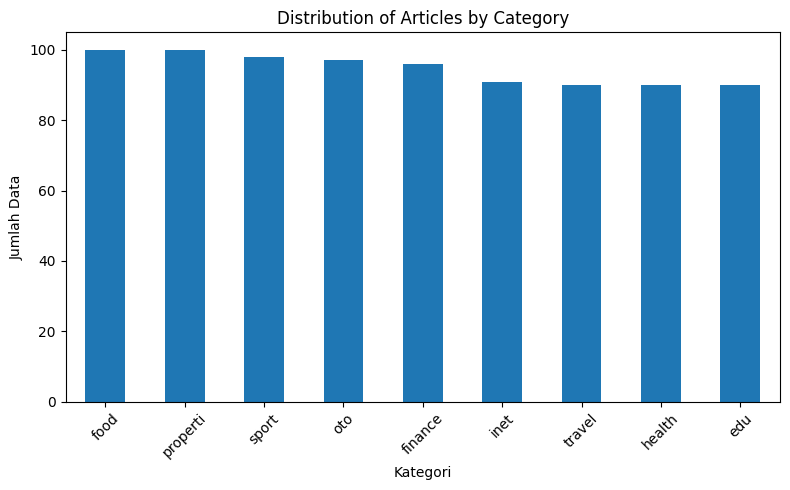

In [8]:
# Visualize persebaran kategori
import matplotlib.pyplot as plt

class_count = df['kategori'].value_counts()

plt.figure(figsize=(8, 5))
class_count.plot(kind='bar')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.title('Distribution of Articles by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Ekspor Data

Terakhir, kita mengekspor data yang terkumpul ke dalam file CSV untuk analisis lebih lanjut atau digunakan di aplikasi lain.

In [13]:
# Export dengan bentuk dataset CSV
folder_path = 'data'
file_path = os.path.join(folder_path, 'berita.csv')

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

df.to_csv(file_path, index=False)

print(f"File successfully saved to {file_path}")

File successfully saved to data\berita.csv
